In [15]:
import networkx as nx
import urllib
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data

In [6]:
with open('../../data/raw/output.json', 'r') as f:
    wikipedia_network = json.load(f)

In [7]:
wikipedia_network[4]

{'name': 'Abd%C3%BClaziz',
 'links': ['%C5%9Eehzade_Yusuf_Izzeddin',
  'Abdul_Hamid_II',
  'Abdulmejid_II',
  'D%C3%BCrr%C3%BC%C5%9Fehvar_Sultan',
  'D%C3%BCrr%C3%BCnev_Kad%C4%B1n',
  'Edadil_Kad%C4%B1n',
  'Edward_VII',
  'Emine_Sultan_(daughter_of_Abd%C3%BClaziz)',
  'Esma_Sultan_(daughter_of_Abd%C3%BClaziz)',
  'Franz_Joseph_I_of_Austria',
  'Gevheri_Kad%C4%B1n',
  'Gevheri_Sultan',
  'Hayranidil_Kad%C4%B1n',
  'Isma%27il_Pasha',
  'Maurice_de_Hirsch',
  'Mehmed_Abdulaziz',
  'Mihri%C5%9Fah_Sultan_(daughter_of_%C5%9Eehzade_Izzeddin)',
  'Murad_V',
  'Nazime_Sultan',
  'Nesrin_Kad%C4%B1n',
  'Prince_Arthur,_Duke_of_Connaught_and_Strathearn',
  'Saliha_Sultan_(daughter_of_Abd%C3%BClaziz)'],
 'dob': [1830, None, None]}

the strang symbol "%C3%BC" is url encoding, you can need to convert them (urllib.parse.unquote) during processing.

In [8]:
urllib.parse.unquote(wikipedia_network[4]['name'])

'Abdülaziz'

In [9]:
len(wikipedia_network)

1259410

In [10]:
# import random
# sub_network = random.sample(wikipedia_network, 5000)

# Create the directed graph

In [60]:
G = nx.DiGraph()
#for entry in sub_network:

duplicated_edge = 0
self_loop = 0
for entry in wikipedia_network:
    source = urllib.parse.unquote(entry['name'])
    G.add_node(source)
    if len(entry['links']) > 0:
        for l in entry['links']:
            target = urllib.parse.unquote(l)
            if G.has_edge(*(target, source)):
                duplicated_edge += 1
            else:
                if target == source:
                    self_loop += 1
                else:
                    G.add_edge(*(target, source))
print(f'number of duplicated edge: {duplicated_edge}')
print(f'number of self loop: {self_loop}')

number of duplicated edge: 0
number of self loop: 956


In [61]:
G.number_of_nodes()

1259410

In [62]:
G.number_of_edges()

4352966

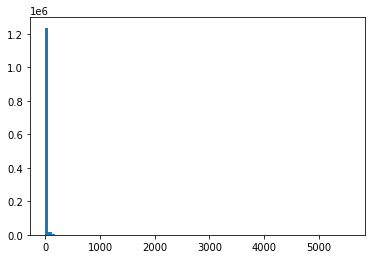

In [63]:
def plot_degree_dist(graph):
    degrees = [graph.degree(n) for n in graph.nodes()]
    plt.hist(degrees, bins=100)

plot_degree_dist(G)

most people has less than 10 connections, the majority only has 3.

In [64]:
(pd.Series([G.degree(n) for n in G.nodes()]).value_counts().sort_values()/len(G.nodes())).round(2)

1022    0.00
1049    0.00
856     0.00
338     0.00
882     0.00
        ... 
4       0.06
3       0.07
2       0.10
1       0.12
0       0.33
Length: 715, dtype: float64

This shows that 33% has no connections. It's going to be hard to be extremely difficult to create circles for those that have 0 or 1 edges using partition or community detection methods. We will re-create the graph and drop entries that have less than 2 links for computational efficiency. In a realistic scenario, I would use auxililary information say courses/class they have browsed to recommend circle.

# Create the network without users that has less than 2 connections

In [66]:
G = nx.DiGraph()
#for entry in sub_network:

duplicated_edge = 0
self_loop = 0
for entry in wikipedia_network:
    if len(entry['links']) >= 2:
        source = urllib.parse.unquote(entry['name'])
        G.add_node(source)
        for l in entry['links']:
            target = urllib.parse.unquote(l)
            if G.has_edge(*(target, source)):
                duplicated_edge += 1
            else:
                if target == source:
                    self_loop += 1
                else:
                    G.add_edge(*(target, source))
print(f'number of duplicated edge: {duplicated_edge}')
print(f'number of self loop: {self_loop}')


number of duplicated edge: 0
number of self loop: 868


In [67]:
G.number_of_nodes()

727723

In [68]:
G.number_of_edges()

4157491

In [69]:
nx.adjacency_matrix(G).count_nonzero()

4157491

I think another way to create the graph would be delete the edge if the reciprocal can not be found and then delete nodes that has no edge.

In [80]:
friendship_graph = G.to_undirected(reciprocal=True, as_view=False)

In [81]:
friendship_graph.number_of_nodes()

727723

In [82]:
friendship_graph.number_of_edges()

601814

In [83]:
check = nx.adjacency_matrix(friendship_graph)
abs(check - check.T) > 1e-10

<727723x727723 sparse matrix of type '<class 'numpy.bool_'>'
	with 0 stored elements in Compressed Sparse Row format>

Interesting that the number of edges is significantly lower which implies that a lot of the edges are only one way.

In [84]:
(pd.Series([friendship_graph.degree(n) for n in friendship_graph.nodes()]).value_counts().sort_values()/len(friendship_graph.nodes())).round(2)

175    0.00
140    0.00
135    0.00
139    0.00
133    0.00
       ... 
4      0.03
3      0.06
2      0.12
1      0.18
0      0.53
Length: 135, dtype: float64

Further, this shows that the majority of the users now do not have a connection.

In [103]:
friendship_final_graph = friendship_graph.subgraph([n for n, d in friendship_graph.degree if d > 0])

In [105]:
friendship_final_graph.number_of_nodes()

342068

In [104]:
friendship_final_graph.number_of_edges()

601814

This looks about right as we drop about 53% of the nodes, so we are left about a quarter of all total ndoes loaded from the raw data.

# ---------------------------

In [ ]:
friendship_graph.subgraph([i for i in friendship_graph.nodes() if i.out_degree

In [1]:
display

<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>

In [9]:
from IPython.core.display import display

In [10]:
import pandas as pd
display(pd.DataFrame({'a':1, 'b': 2}, index=[0]))

,a,b
0,1,2


In [72]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

(-1.099423533678055,
 1.087894207239151,
 -1.0892313510179519,
 1.0959326416254043)

In [119]:
from community import community_louvain
communities = community_louvain.best_partition(friendship_final_graph)

In [156]:
group_dict = {}
for k, v in communities.items():
    if v in group_dict:
        group_dict[v].append(k)
    else:
        group_dict[v] = [k]

In [158]:
len(group_dict)

30041

In [174]:
top_10k_index = np.argsort([len(v)for v in group_dict.values()])[::-1][:10000]
top10k_circle = {k:v for k, v in group_dict.items() if k in top_10k_index}

In [175]:
len(top10k_circle)

10000

In [185]:
top10k_circle[top_10k_index[180]][:20]

['Frank_Stout',
 'Matthew_Mullineux',
 'Emily_Quihampton',
 'Elizabeth_Watkins',
 'Albert_de_Lande_Long',
 'Tom_Edwards-Moss',
 'Alfred_Trower',
 'Gilbert_Kennedy_(rower)',
 'Clement_Courtenay_Knollys',
 'Alfred_Dicker',
 'Charlie_Adamson',
 'Guy_Nickalls',
 'Frank_Lumley_Playford',
 'Lewis_Vaughan_Lodge',
 'Stanley_Muttlebury',
 'Francis_Gulston',
 'William_Fawcus',
 'James_Bailey_(British_politician)',
 'Charles_Lodge_Adamson',
 'Percy_Stout']

Looks like this is a circle about English sportsmans.

In [183]:
top10k_circle[top_10k_index[50]][:20]

['Jess_Roskelley',
 'Frank_Samuelsen_and_George_Harbo',
 'Ross_Bagdasarian_Sr.',
 'Vivian_Fuchs',
 'Marc_Bekoff',
 'Douglas_H._Wheelock',
 'Ousainou_Darboe',
 'Emma_Hwang',
 'Henry_Way_Kendall',
 'Robert_Wright_(journalist)',
 'Armand_Charlet',
 'Tadanori_Yokoo',
 'Samuel_C._Phillips',
 'David_Scott',
 'Michael_Dacher',
 'Donna_Haraway',
 'Mark_Kelly',
 'Tenzing_Norgay',
 'Auguste_Piccard',
 'Percy_Wyn-Harris']

Looks like this circle is all about exploration and astronaughts.

In [188]:
len(set([i for v in top10k_circle.values() for i in v]))/friendship_final_graph.number_of_nodes()

0.8799419998362898

Based on this, we were able to cover 88% of the users, which is quite good.

Of course we can plot the results, but it would be too large to plot and visualise in notebook.

In [140]:

# basic usage
import community as community_louvain
import networkx as nx
G = nx.erdos_renyi_graph(100, 0.01)
partion = community_louvain.best_partition(G)



In [141]:
G.number_of_nodes()

100

In [ ]:
# display a graph with its communities:
# as Erdos-Renyi graphs don't have true community structure,
# instead load the karate club graph
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
G = nx.karate_club_graph()
# compute the best partition
partition = community_louvain.best_partition(G)
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, 
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [159]:
nx.average_clustering(test_g.subgraph(partition[4]))

1.0

This however divies the network into mutually exclusive partitions, which is not necessary what we want.

In [108]:
partition = next(communities_generator)


In [111]:
nx.algorithms.community.quality.coverage(G, partition)

0.5

In [112]:
partition

({0}, {1}, {2}, {3, 4}, {6, 7, 8, 9, 10}, {5})

In [ ]:
G = nx.Graph()
for entry in sub_network:
    source = entry['name']
    G.add_node(source)
    if len(entry['links']) > 0:
        for l in entry['links']:
            G.add_edge(*(source, l))

In [ ]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))